In [1]:
pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

Processing ./mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose_hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=132359 sha256=5e172ef6e6ff2fb974ae9eee6480efada845529125dbc30490b1d9072112d6f9
  Stored in directory: /private/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/pip-ephem-wheel-cache-b1wq6h5t/wheels/77/c5/de/7a63a2c78a12ad335a5091a9209439e12d86616744464a5ae4
Successfully built mlrose_hiive
  Attempting uninstall: mlrose_hiive
    Found existing installation: mlrose_hiive 2.2.4
    Uninstalling mlrose_hiive-2.2.4:
      Successfully uninstalled mlrose_hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
"""
# B.
def border_swap(problem, next_gen, child, schedule):
    if schedule is None:
        print("order is none.")
        return next_gen
    if len(next_gen) == 0:
        next_gen.append(child)
    else:
        for i in schedule:
            if schedule[i] == -1 and i < len(schedule) - 1:
                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]
        temp_schedule = [i for i in schedule if i != -1]
        #if problem.eval_fitness(temp_schedule) > problem.eval_fitness(child):
        next_gen.append(temp_schedule)
    return next_gen
"""

'\n# B.\ndef border_swap(problem, next_gen, child, schedule):\n    if schedule is None:\n        print("order is none.")\n        return next_gen\n    if len(next_gen) == 0:\n        next_gen.append(child)\n    else:\n        for i in schedule:\n            if schedule[i] == -1 and i < len(schedule) - 1:\n                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]\n        temp_schedule = [i for i in schedule if i != -1]\n        #if problem.eval_fitness(temp_schedule) > problem.eval_fitness(child):\n        next_gen.append(temp_schedule)\n    return next_gen\n'

In [3]:
import mlrose_hiive as mh

In [4]:
#help(mh.runners)

In [5]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [6]:
import pandas as pd
import utility as u
import importlib

In [7]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [8]:
size = 13
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [9]:
"""
with open(f"{size}_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)
"""

'\nwith open(f"{size}_tasks.txt", "a") as f:\n    for t in tasks:\n        print(t.task_id, t.duration, t.deadline, t.profit, file=f)\n'

In [10]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [11]:
problem_ffp.length

13

In [12]:
problem_ffp.fitness

143.0

In [13]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40, 50, 60],
              mutation_rates=[0.07, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [14]:
df_run_curves_ffp.shape

(3559, 7)

In [15]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.004006,170.0,0.0,40,0.07,2048
1,1,0.017941,191.0,2.0,40,0.07,2048
2,2,0.029062,191.0,3.0,40,0.07,2048
3,3,0.034753,191.0,4.0,40,0.07,2048
4,4,0.045002,191.0,5.0,40,0.07,2048


In [16]:
df_run_curves_ffp['Fitness'].max()

299.0

In [17]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
78,78,0.949294,299.0,104.0,40,0.07,2048
79,79,0.954582,299.0,105.0,40,0.07,2048
80,80,0.961924,299.0,106.0,40,0.07,2048
81,81,0.966168,299.0,107.0,40,0.07,2048
82,82,0.974391,299.0,108.0,40,0.07,2048
...,...,...,...,...,...,...,...
3554,611,0.305162,299.0,633.0,60,0.08,2048
3555,612,0.320533,299.0,634.0,60,0.08,2048
3556,613,0.328632,299.0,635.0,60,0.08,2048
3557,614,0.335014,299.0,636.0,60,0.08,2048


In [18]:
# need to check Time and FEvals

In [19]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [20]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
78,78,0.949294,299.0,104.0,40,0.07,2048
79,79,0.954582,299.0,105.0,40,0.07,2048
80,80,0.961924,299.0,106.0,40,0.07,2048
81,81,0.966168,299.0,107.0,40,0.07,2048
82,82,0.974391,299.0,108.0,40,0.07,2048
...,...,...,...,...,...,...,...
3554,611,0.305162,299.0,633.0,60,0.08,2048
3555,612,0.320533,299.0,634.0,60,0.08,2048
3556,613,0.328632,299.0,635.0,60,0.08,2048
3557,614,0.335014,299.0,636.0,60,0.08,2048


In [21]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,40,0.07,104.0,328.0,0.949294
1,40,0.08,130.0,356.0,0.000685
2,50,0.07,115.0,340.0,0.000685
3,50,0.08,98.0,319.0,0.847978
4,60,0.07,119.0,345.0,0.000685
5,60,0.08,137.0,365.0,0.000685


In [22]:
# tentatively, pick pop size = 50 and mutation_rate = 0.08

In [23]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.004006,170.0,0.0,40,0.07,2048
1,1,0.017941,191.0,2.0,40,0.07,2048
2,2,0.029062,191.0,3.0,40,0.07,2048
3,3,0.034753,191.0,4.0,40,0.07,2048
4,4,0.045002,191.0,5.0,40,0.07,2048


In [24]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [25]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[50], # 20 bits in total
              mutation_rates=[0.08])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [26]:
df_iter_curves_ffp.shape

(5965, 7)

In [27]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.002854,170.0,0.0,50,0.08,2048
1,1,0.020326,180.0,2.0,50,0.08,2048
2,2,0.046016,184.0,4.0,50,0.08,2048
3,3,0.080606,184.0,5.0,50,0.08,2048
4,4,0.093949,186.0,7.0,50,0.08,2048


In [28]:
df_iter_curves_ffp.Fitness.max()

299.0

In [29]:
df_iter_curves_ffp.to_csv(f'gab_mutate_js_{size}.csv')

In [1]:
import pandas as pd
import numpy as np
size = 13
df_iter_curves_ffp = pd.read_csv(f'../../csv-files/gab_mutate_js_{size}.csv')

In [30]:
df_iter_curves_ffp.Iteration.max()

635

In [2]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [32]:
df_fitness_iter_ffp.shape

(636, 3)

In [33]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,151.1,995.433333
1,1,190.4,33.377778
2,2,196.7,104.233333
3,3,202.3,125.566667
4,4,206.0,173.555556


In [34]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

69      69
70      70
71      71
72      72
73      73
      ... 
586    586
587    587
588    588
589    589
590    590
Name: Iteration, Length: 5010, dtype: int64

In [35]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

135

In [3]:
converge_iter = df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

In [36]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [37]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,151.1,995.433333,31.550489
1,1,190.4,33.377778,5.777350
2,2,196.7,104.233333,10.209473
3,3,202.3,125.566667,11.205653
4,4,206.0,173.555556,13.174049


Text(0, 0.5, 'Fitness')

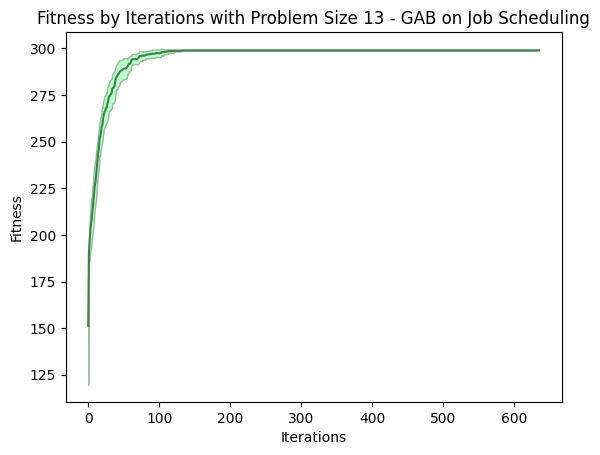

In [38]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - GAB on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [39]:
df_fitness_iter_ffp.avg_fitness.max()

299.0

In [40]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

13.535549900580731

In [41]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(0    0
 Name: Iteration, dtype: int64,)

In [42]:
# Fevals - iteration

In [4]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [44]:
df_FEvals_iter_ffp.shape

(636, 3)

In [45]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.9,0.100000
2,2,3.5,0.277778
3,3,5.1,0.544444
4,4,6.6,0.711111


In [5]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [6]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
135,135,159.6,9.155556,3.025815


In [47]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 3.5023801430836543)

In [48]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.9,0.100000,0.316228
2,2,3.5,0.277778,0.527046
3,3,5.1,0.544444,0.737865
4,4,6.6,0.711111,0.843274


Text(0, 0.5, 'FEvals')

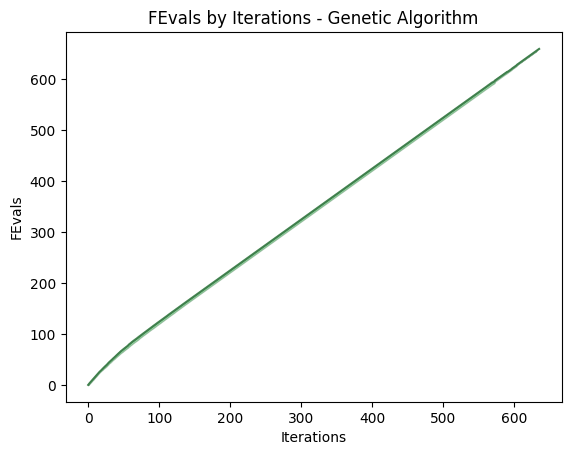

In [49]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [50]:
# fitness - wall clock time

In [7]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [52]:
df_time_iter_ffp.shape

(636, 3)

In [53]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.001595,0.000003
1,1,0.013264,0.000098
2,2,0.025372,0.000246
3,3,0.037407,0.000513
4,4,0.045623,0.000643


In [8]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [9]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_time,var_time,stddev_time
135,135,1.198249,0.285854,0.534653


In [55]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.001595,0.000003,0.001777
1,1,0.013264,0.000098,0.009913
2,2,0.025372,0.000246,0.015689
3,3,0.037407,0.000513,0.022656
4,4,0.045623,0.000643,0.025353


Text(0, 0.5, 'Time')

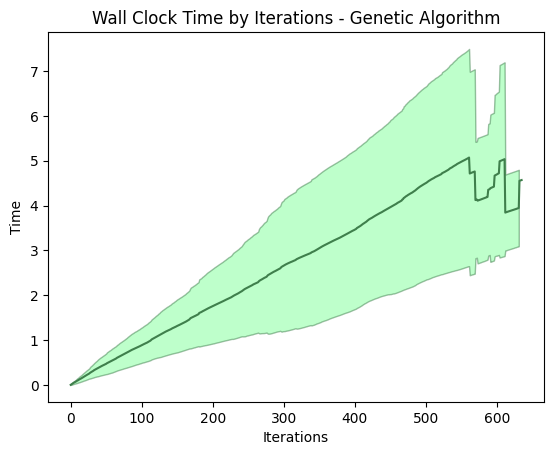

In [56]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [57]:
df_time_iter_ffp.stddev_time.max()

2.422896356118073

In [58]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

561    561
Name: Iteration, dtype: int64

In [59]:
df_time_iter_ffp.avg_time.max()

5.071445364796091